# Random Feature Amplification experiment
## TODO

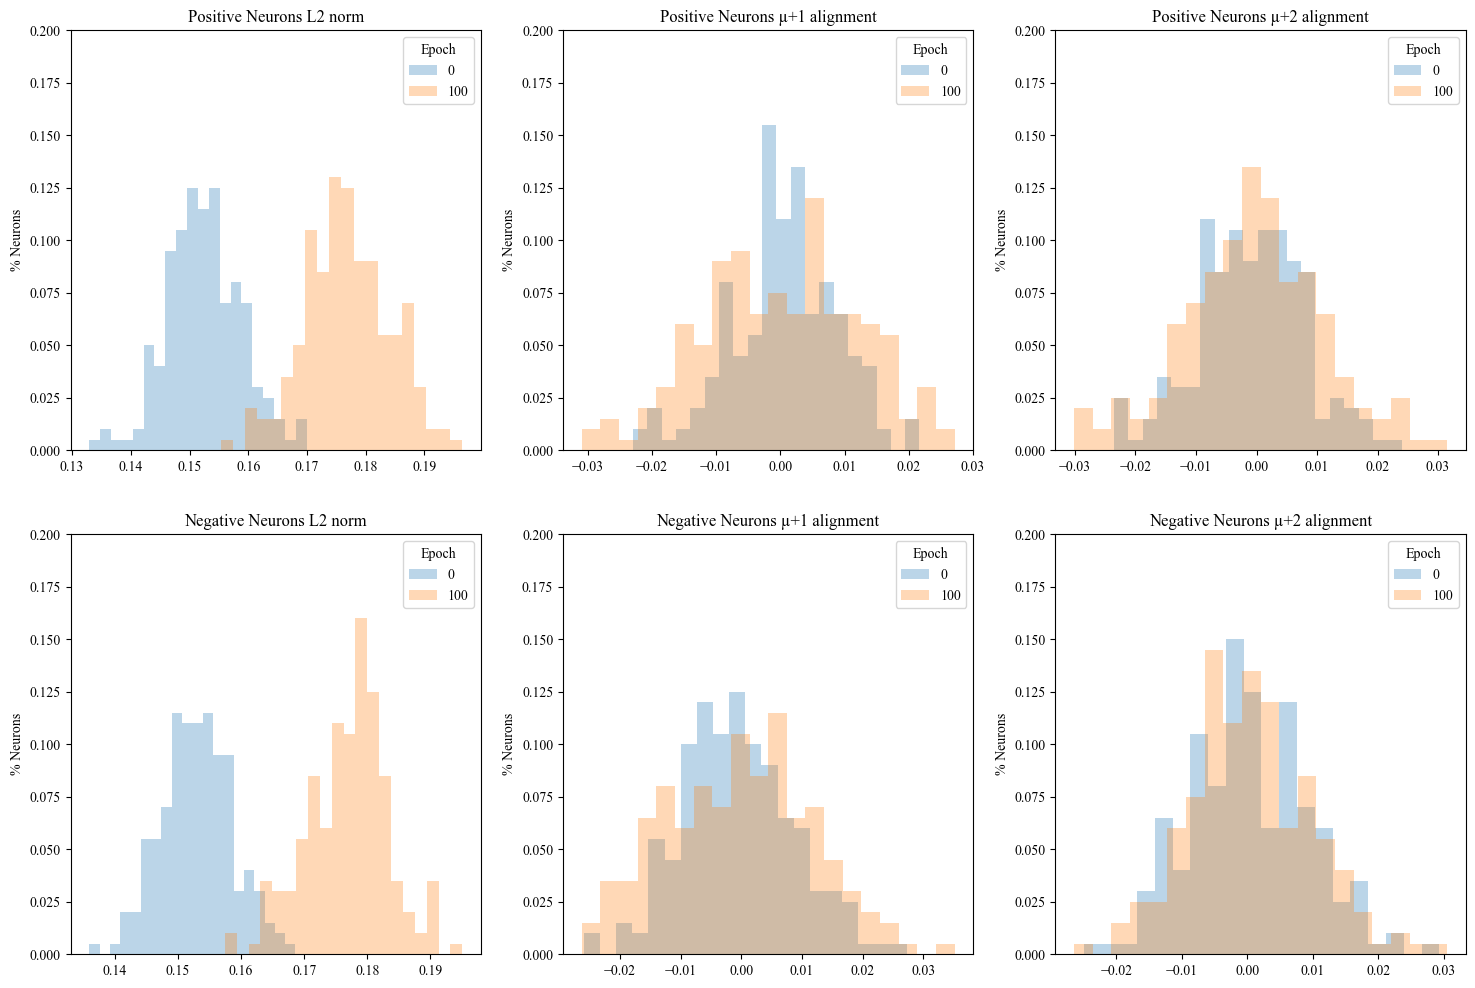

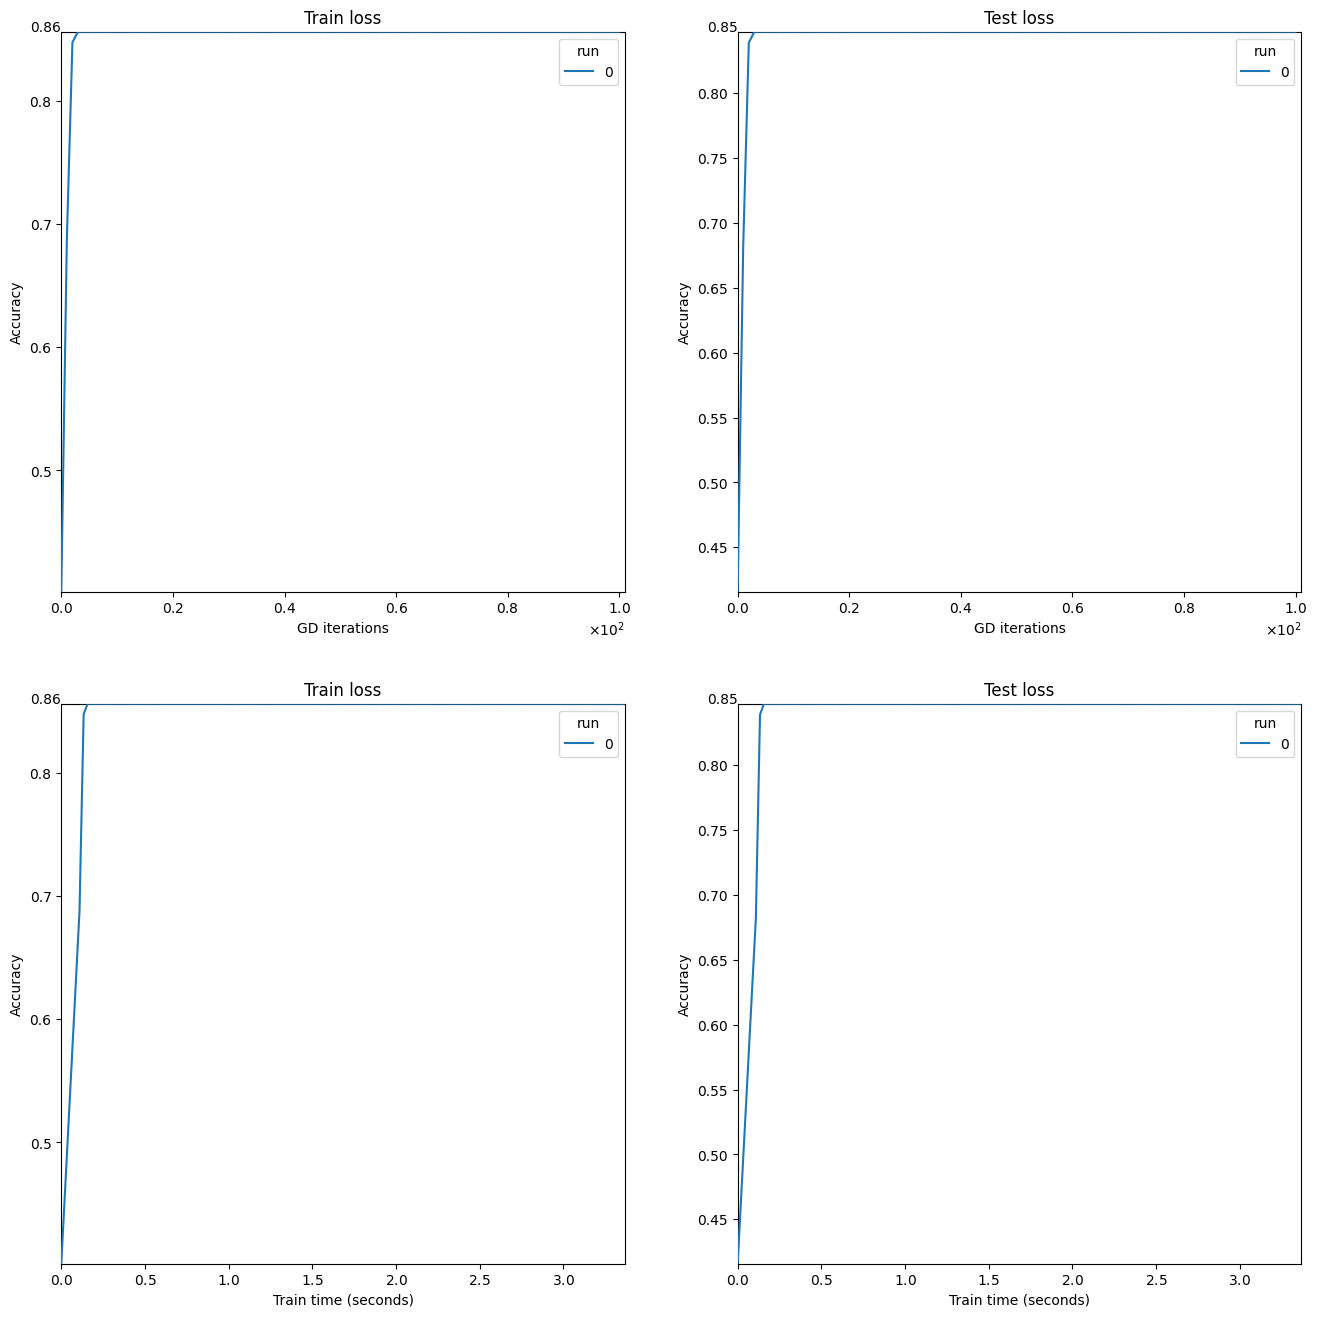

In [1]:
from experiment import execute_experiment
from plots import norm_and_alignments_histograms

experiment_results = execute_experiment(
    seed=12345,
    noise_rate=0.15,
    within_cluster_variance=1. / (300. ** 1.2),
    input_dimension=300,
    sample_size=5000,
    batch_size=5000,
    epochs=100,
    learning_rate=1. / 300. ** (1. / 4.),
    hidden_units=400,
    initialization_variance=1 / (32. * 400.),
    runs_per_model=1,
    save_models_path='./models/',
    save_experiments_path='./experiments/',
    callback=norm_and_alignments_histograms,
    plot_results=True,
    saving_epochs_interval=100
)

In [2]:
from experiment import PrunableTwoLayerNeuralNet
from plots import samples_and_activation
from settings.noisy_2xor import get_dataloader
from utils.optimization import Accuracy, initialize

initialize(experiment_results['seed'])

data, rotation_matrix = get_dataloader(**experiment_results)
_, (inputs, labels) = next(enumerate(data))

model = PrunableTwoLayerNeuralNet.load('./models/', {**experiment_results, 'run': 0})
model.eval()

print(f'Accuracy: {Accuracy(model(inputs), labels)}')

Accuracy: 0.8560000061988831


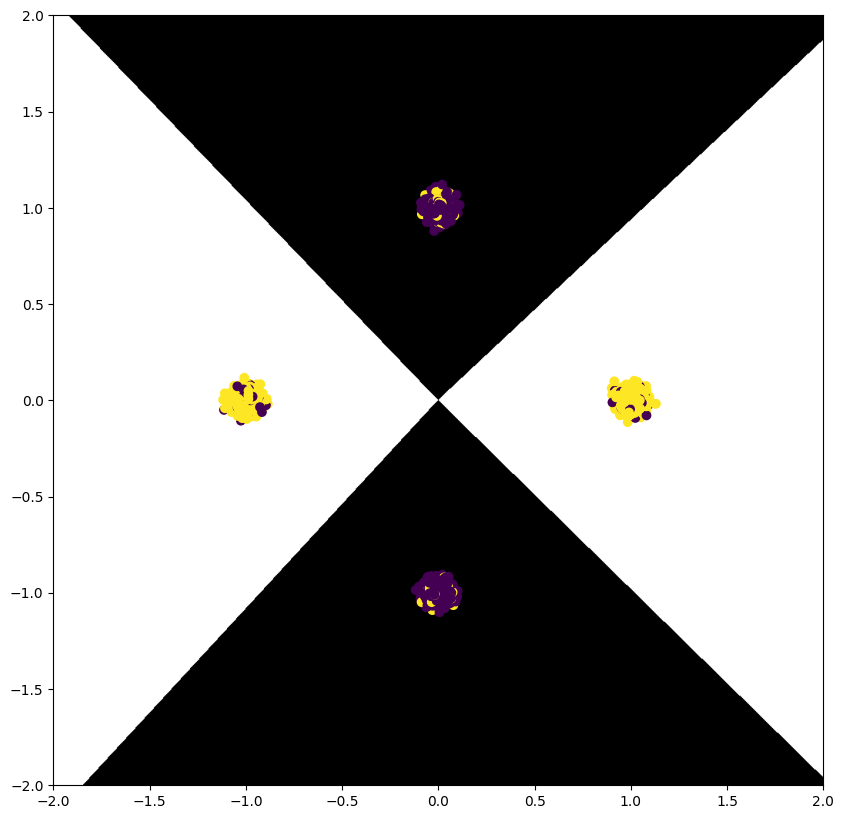

In [3]:
samples_and_activation(inputs, labels, model, rotation_matrix=rotation_matrix, **experiment_results)

In [4]:
pruning_ratio = 0.99
model.prune_weights_by_magnitude(pruning_ratio)

print(f'Accuracy: {Accuracy(model(inputs), labels)}')

Accuracy: 0.8560000061988831


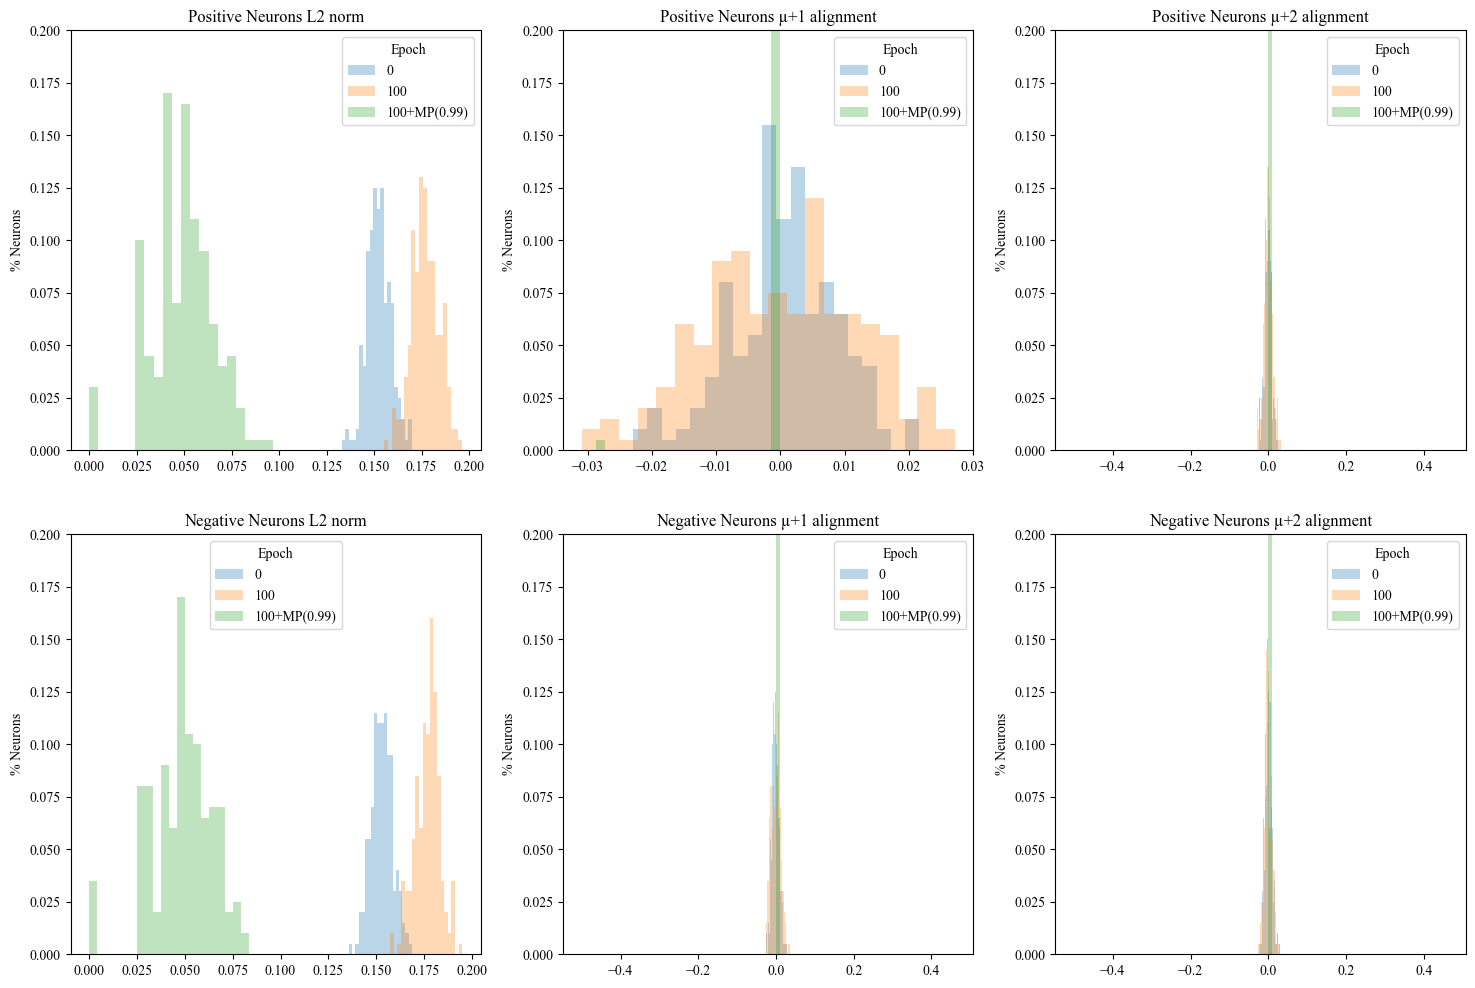

In [5]:
from plots import norm_and_alignments_histograms, fig

norm_and_alignments_histograms(model, epoch=f'{experiment_results["epochs"]}+MP({pruning_ratio:.2f})', **experiment_results)
fig

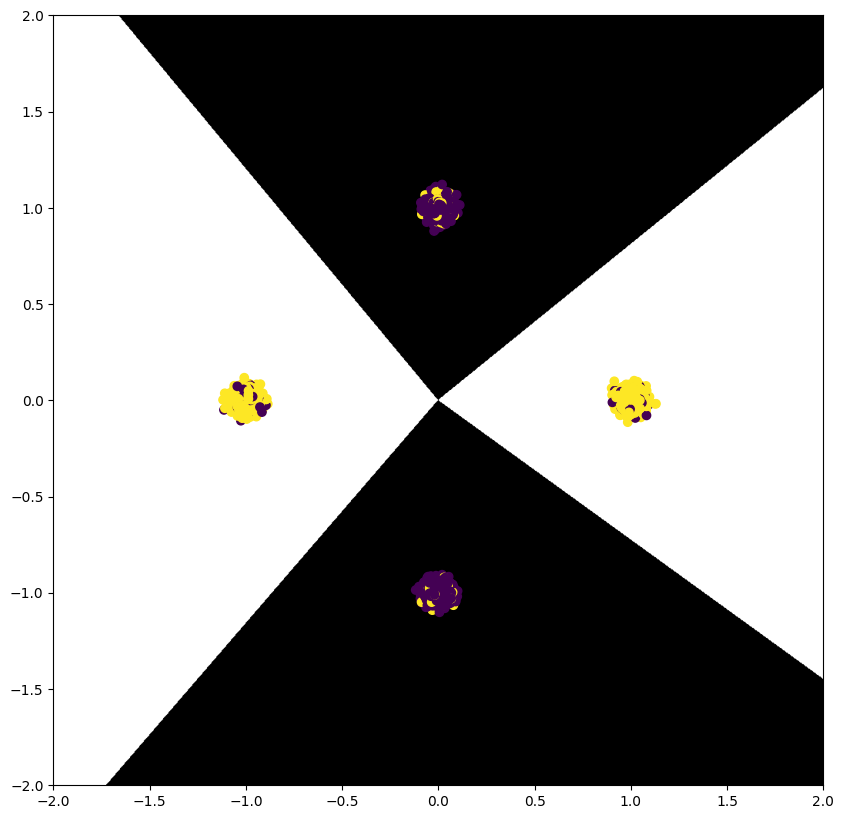

In [6]:
samples_and_activation(inputs, labels, model, rotation_matrix=rotation_matrix, **experiment_results)